# Low-energy spectra.

In [1]:
import numpy as np
import h5py as hdf
import pandas as pd
import matplotlib.pyplot as plt
from data_io import *

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret / n
#     return ret[n - 1:] / n


data_dir = '../python_data/low_energy_comparison/'

### 2x2x2, fixed lamba

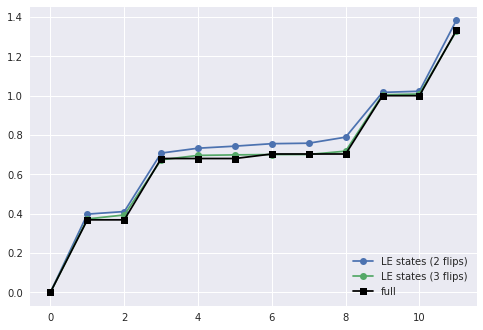

In [16]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    cutoff = 12
    
    for ex in [2,3]:
        le_spectrum = read_spectrum(data_dir+"le_spectrum_bosons_ex{:d}_2x2x2_lam-3.00.dat".format(ex))
        le_gap = le_spectrum[:cutoff]-le_spectrum[0]
        ax.plot(le_gap, marker='o', label=f'LE states ({ex} flips)')
    
    
    spectrum = read_spectrum(data_dir+"spectrum_bosons_2x2x2_lam-3.00.dat")
    gap = spectrum[:cutoff]-spectrum[0]
    ax.plot(gap, marker='s', label='full', color='black')
    
    ax.legend(loc='lower right')

### 2x2x4

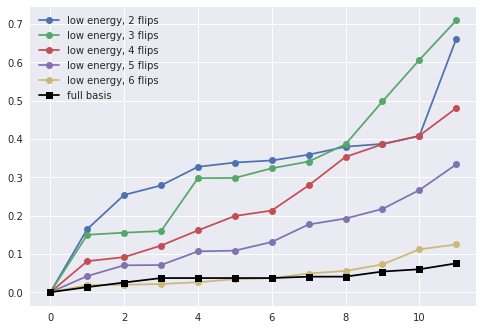

In [19]:
param = {
    'L' : [2,2,4],
    'lambda' : -3.0
}

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    cutoff = 12
    for ex in [2, 3, 4, 5, 6]:
        le_spectrum = read_spectrum(data_dir+"le_spectrum_bosons_ex{:d}_{:d}x{:d}x{:d}_lam{:.2f}.dat".format(ex, *param['L'], param['lambda']))
        le_gap = le_spectrum[:cutoff]-le_spectrum[0]
        ax.plot(le_gap, marker='o', label='low energy, {:d} flips'.format(ex))

    
    spdf = retrieve_spectrum_pandas(data_dir+'multi_spectrum_bosons_wx_4-wy_4-wz_2_{:d}x{:d}x{:d}.dat'.format(*param['L']))
    spectrum = spdf[spdf['lambda']==param['lambda']].iloc[0]['spectrum']
    gap = spectrum[:cutoff]-spectrum[0]
    ax.plot(gap, marker='s', label='full basis', color='black')
    
#     fig.set_size_inches('$$')
    ax.legend(loc='upper left')

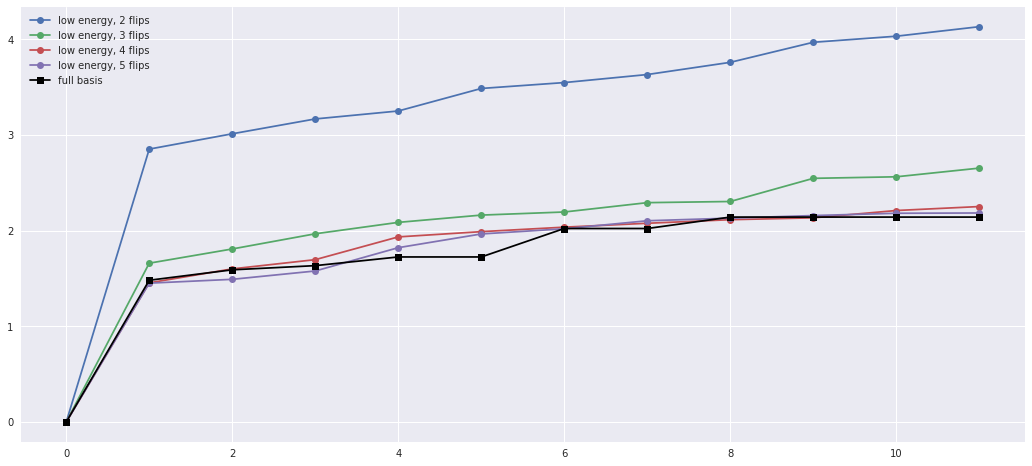

In [21]:
param = {
    'L' : [2,2,4],
    'lambda' : 0.02
}

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    fig.set_size_inches(18,8)
    
    cutoff = 12
    for ex in [2,3,4,5]:
        le_spectrum = read_spectrum(data_dir+"le_spectrum_bosons_ex{:d}_{:d}x{:d}x{:d}_lam{:.2f}.dat".format(ex, *param['L'], param['lambda']))
        le_gap = le_spectrum[:cutoff]-le_spectrum[0]
        ax.plot(le_gap, marker='o', label='low energy, {:d} flips'.format(ex))

    
    spdf = retrieve_spectrum_pandas(data_dir+'multi_spectrum_bosons_wx_4-wy_4-wz_2_{:d}x{:d}x{:d}.dat'.format(*param['L']))
    spectrum = spdf[np.round(spdf['lambda'],2)==param['lambda']].iloc[0]['spectrum']
    gap = spectrum[:cutoff]-spectrum[0]
    ax.plot(gap, marker='s', label='full basis', color='black')
    
    ax.legend(loc='upper left')

## Lower spectrum comparison.

2 x 2 x 2


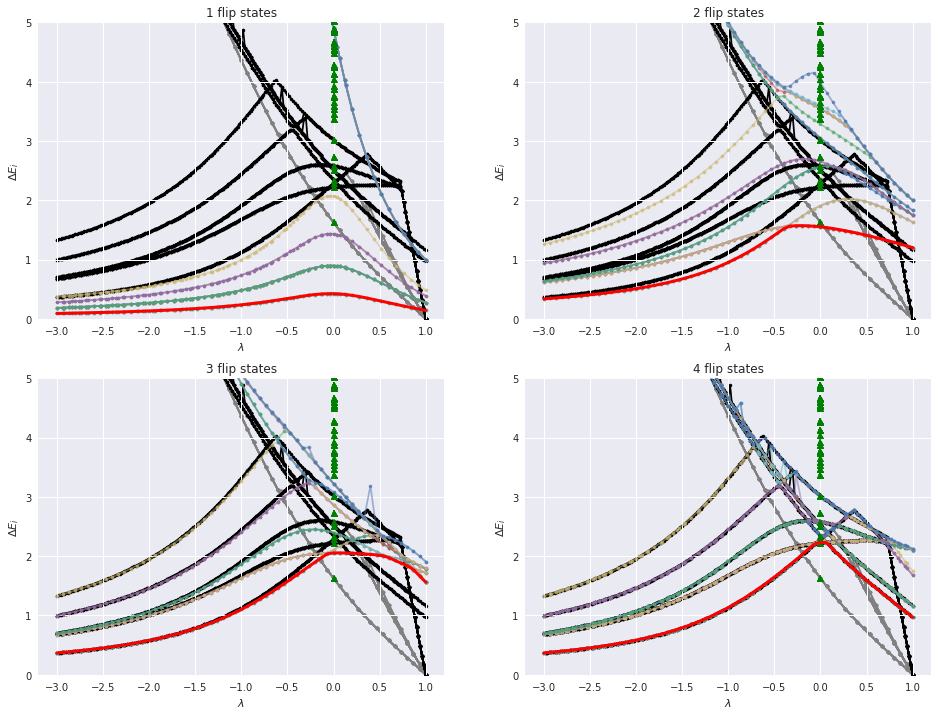

In [56]:
param = {
    'L' : [2,2,2],
    'gauge_particle' : 'bosons'
}

# Read the data.
# le_datafile = data_dir+'LE_multi_spectrum_bosons_2x2x2.hdf5'
# le_data = {k : retrieve_le_spectrum_numpy(le_datafile, grp='ex_{:d}'.format(k)) for k in range(1,6)}
le_datafile = data_dir+'LE_results_bosons_all-ws_2x2x2.hdf5'
le_data = {k : retrieve_le_spectrum_numpy(le_datafile, grp='ex{:d}'.format(k)) for k in range(1,5)}

# Debasish data.
db_datadir = '../c_code/ED_3d/'
db_bose = pd.read_csv(db_datadir+'boseLinks/evals.dat', names=['n', 'energy'], sep='\s+')



n_levels = 4
with plt.style.context('seaborn'):
    ncols = 2
    nrows = int(np.ceil(n_levels/ncols))
    fig, bx = plt.subplots(nrows,ncols)
    fig.set_size_inches(8*ncols,6*nrows)
    bx = bx.flatten()
        
    for k, max_level in enumerate(range(1,n_levels+1)):

        # Toggls the number of levels only in the upper plot.
        n_states = 20
    #     max_level = 3

        lambdas = le_data[max_level][0]
        data = le_data[max_level][1]
        gs = data[:,0]
        for i in range(1, n_states):
            bx[k].plot(lambdas, data[:,i]-gs, marker='.', ls='-', alpha=0.5)
            if i==1:
                bx[k].plot(lambdas, data[:,i]-gs, marker='', ls='-', color='red', zorder=10, lw=3)

        db = np.array(sorted(db_bose['energy']))
        bx[k].plot([0]*(len(db)-1), db[1:]-db[0], color='green', ls='', marker='^')
            
        # Full solution (all ws).
        full_datafile = data_dir+'results_bosons_all-ws_2x2x2.hdf5'
        lambdas, full_data = retrieve_spectrum_numpy(full_datafile)
        gs = full_data[:,0]
        for i in range(1, n_states):
            bx[k].plot(lambdas, full_data[:,i]-gs, marker='.', ls='-', color='gray', zorder=0)
            
        # Full solution (0,0,0).
        full_datafile = data_dir+'multi_spectrum_bosons_wx_2-wy_2-wz_2_2x2x2.dat'
        lambdas, full_data = retrieve_spectrum_numpy(full_datafile)
        gs = full_data[:,0]
        for i in range(1, n_states):
            bx[k].plot(lambdas, full_data[:,i]-gs, marker='.', ls='-', color='black', zorder=0)
            
            

            
            
        bx[k].set_xlabel('$\\lambda$')
        bx[k].set_ylabel('$\\Delta E_i$')
        bx[k].set_ylim(0, 5)
        bx[k].set_title('{:d} flip states'.format(max_level))
        

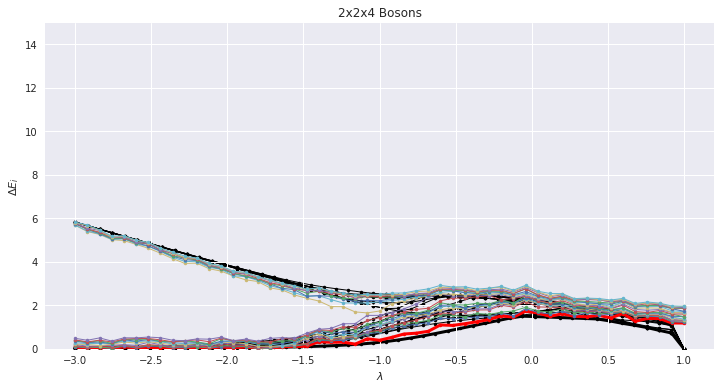

In [24]:
p = {
    'L' : [2,2,4],
    'gauge_particle' : 'bosons'
}

# Read the data.
le_datafile = data_dir+'LE_multi_spectrum_{:s}_{:d}x{:d}x{:d}.hdf5'.format(p['gauge_particle'], *p['L'])
le_data = {k : retrieve_le_spectrum_numpy(le_datafile, k) for k in range(2,5)}

with plt.style.context('seaborn'):
    fig, bx = plt.subplots()
    fig.set_size_inches(12, 6)
    
    # Toggls the number of levels only in the upper plot.
    n_states = 20
    max_level = 4
    
    lambdas = le_data[max_level][0]
    data = le_data[max_level][1]
    gs = data[:,0]
    for i in range(1, n_states):
        bx.plot(lambdas, data[:,i]-gs, marker='.', ls='-', lw=3 if i==1 else 1, color='red' if i==1 else None)
        
        
    # Full solution.
    full_datafile = data_dir+'multi_spectrum_bosons_wx_4-wy_4-wz_2_2x2x4.dat'
    lambdas, full_data = retrieve_spectrum_numpy(full_datafile)
    gs = full_data[:,0]
    for i in range(1, n_states):
        bx.plot(lambdas, full_data[:,i]-gs, marker='.', ls='-', color='black', zorder=0, lw=3 if i==1 else 1)
        
    bx.set_xlabel('$\\lambda$')
    bx.set_ylabel('$\\Delta E_i$')
    bx.set_ylim(0, 15)
    bx.set_title('2x2x4 Bosons')

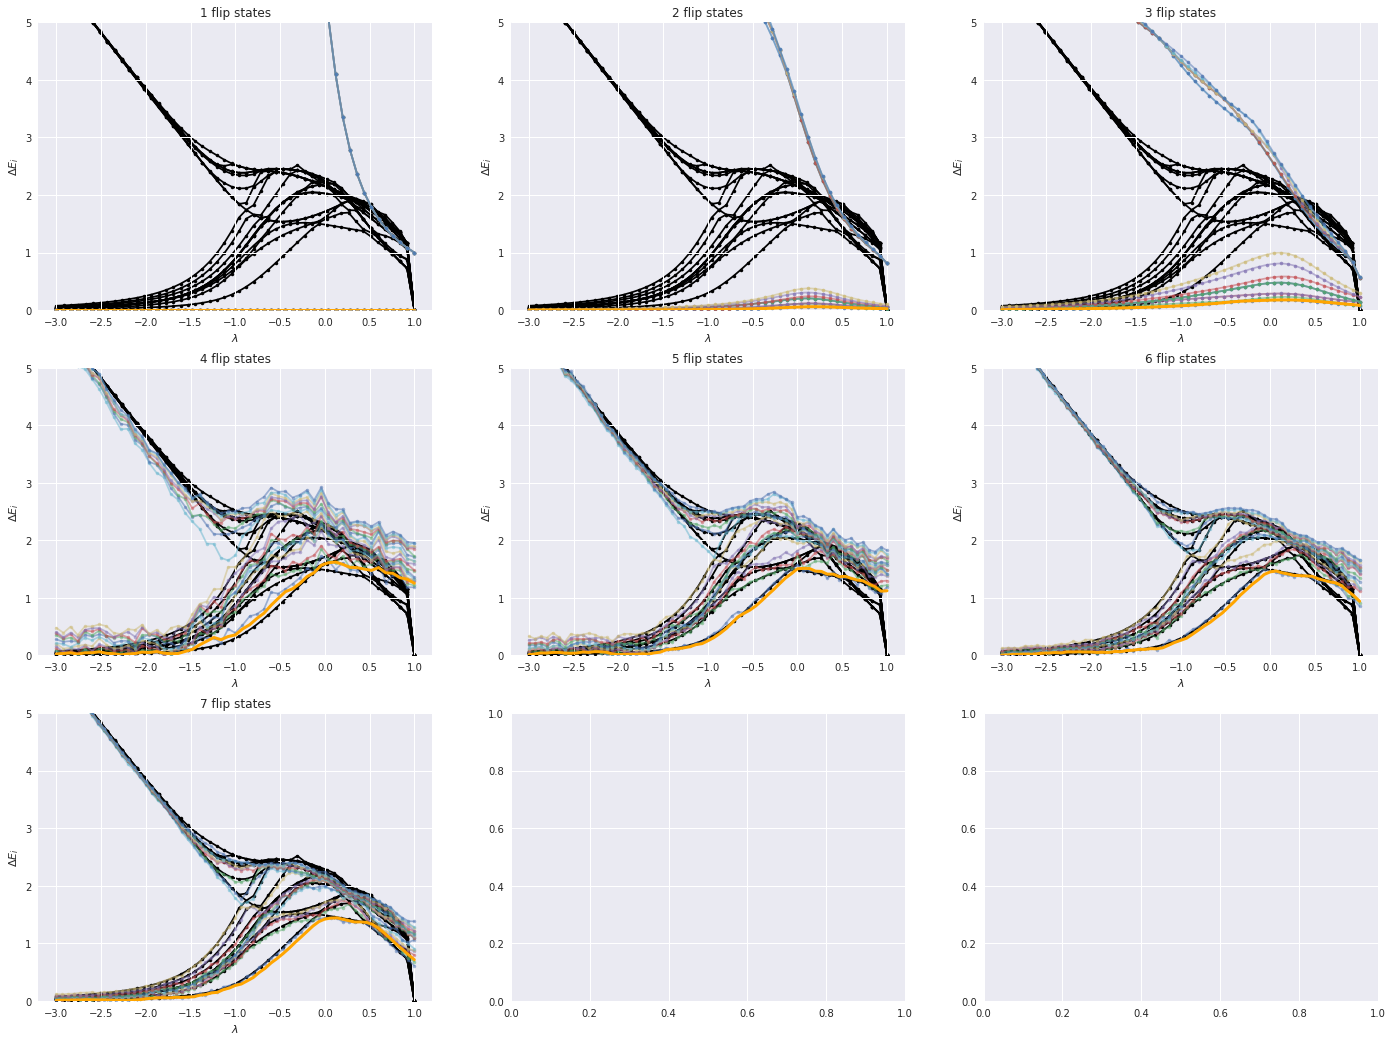

In [55]:
p = {
    'L' : [2,2,4],
    'gauge_particle' : 'bosons'
}

# Read the data.

flip_levels = [1,2,3,4,5,6,7]
le_data = {}
for fl in flip_levels:
    if fl <= 3:
        datafile = 'LE_results_{:s}_all-ws_{:d}x{:d}x{:d}.hdf5'.format(p['gauge_particle'], *p['L'])
        le_data[fl] = retrieve_le_spectrum_numpy(data_dir+datafile, grp=f'ex{fl}')
    elif fl < 5:
        datafile = 'LE_multi_spectrum_{:s}_{:d}x{:d}x{:d}.hdf5'.format(p['gauge_particle'], *p['L'])
        le_data[fl] = retrieve_le_spectrum_numpy(data_dir+datafile, grp=f'ex_{fl}')
    else:
        datafile = 'LE_multi_spectrum_{:s}_FL567_{:d}x{:d}x{:d}.hdf5'.format(p['gauge_particle'], *p['L'])
        le_data[fl] = retrieve_le_spectrum_numpy(data_dir+datafile, grp=f'ex_{fl}')

with plt.style.context('seaborn'):
    ncols = 3
    nrows = int(np.ceil(len(flip_levels)/ncols))
    fig, bx = plt.subplots(nrows,ncols)
    fig.set_size_inches(8*ncols,6*nrows)
    bx = bx.flatten()
        
    for k, max_level in enumerate(flip_levels):

        # Toggls the number of levels only in the upper plot.
        n_states = 20
    #     max_level = 3

        lambdas = le_data[max_level][0]
        data = le_data[max_level][1]
        gs = data[:,0]
        for i in range(1, n_states):
            bx[k].plot(lambdas, data[:,i]-gs, marker='.', ls='-', alpha=0.5)
            if i==1:
                mavg = moving_average(data[:,i]-gs)
                bx[k].plot(lambdas, mavg, marker='', ls='-', color='orange', zorder=10, lw=3)


        # Full solution.
        full_datafile = data_dir+'multi_spectrum_bosons_wx_4-wy_4-wz_2_2x2x4.dat'
        lambdas, full_data = retrieve_spectrum_numpy(full_datafile)
        gs = full_data[:,0]
        for i in range(1, n_states):
            bx[k].plot(lambdas, full_data[:,i]-gs, marker='.', ls='-', color='black', zorder=0)

        bx[k].set_xlabel('$\\lambda$')
        bx[k].set_ylabel('$\\Delta E_i$')
        bx[k].set_ylim(0.00, 5)
#         bx[k].set_yscale('log')
        bx[k].set_title('{:d} flip states'.format(max_level))

### 2x2x6

LE_multi_spectrum_bosons_2x2x6.hdf5
LE_multi_spectrum_bosons_2x2x6.hdf5
LE_multi_spectrum_bosons_2x2x6.hdf5
LE_multi_spectrum_bosons_2x2x6.hdf5
LE_multi_spectrum_bosons_FL5_2x2x6.hdf5
LE_multi_spectrum_bosons_FL6_2x2x6.hdf5


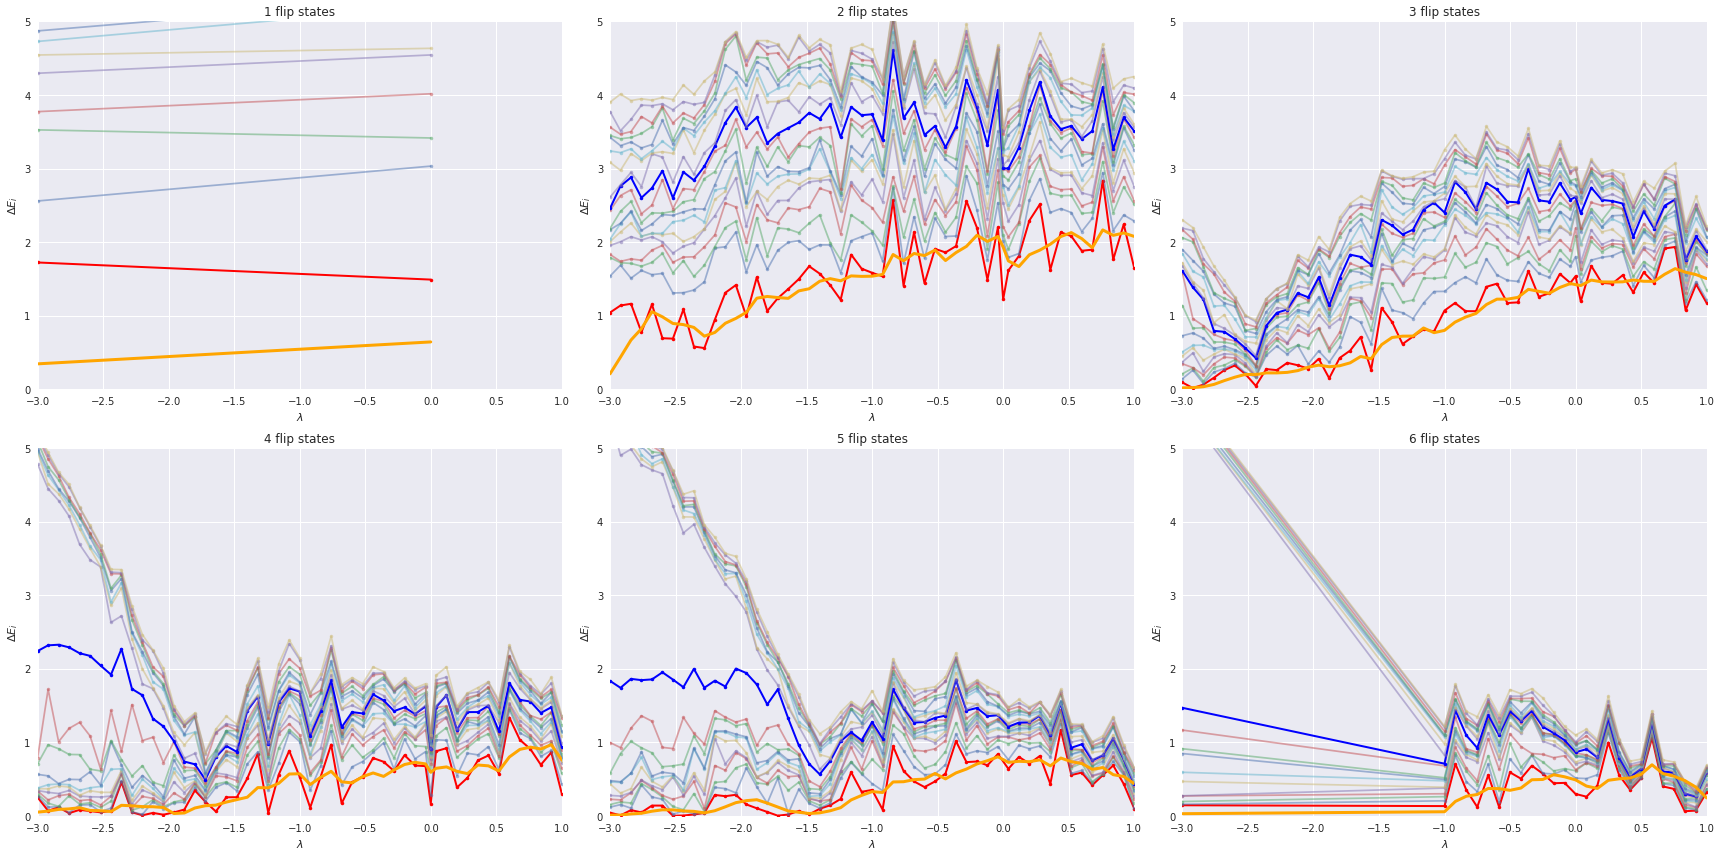

In [29]:
import os

p = {
    'L' : [2,2,6],
    'gauge_particle' : 'bosons'
}
flip_levels = [1,2,3,4,5,6]

# Read the data.
le_data = {}
for fl in flip_levels:
    datafile = 'LE_multi_spectrum_{:s}_FL{:d}_{:d}x{:d}x{:d}.hdf5'.format(p['gauge_particle'], fl, *p['L'])
    if not os.path.isfile(data_dir+datafile):
        datafile = 'LE_multi_spectrum_{:s}_{:d}x{:d}x{:d}.hdf5'.format(p['gauge_particle'], *p['L'])
    print(datafile)
    le_data[fl] = retrieve_le_spectrum_numpy(data_dir+datafile, max_level=fl)

with plt.style.context('seaborn'):
    ncols = 3
    nrows = int(np.ceil(len(flip_levels)/ncols))
    fig, bx = plt.subplots(nrows,ncols)
    fig.set_size_inches(8*ncols,6*nrows)
    bx = bx.flatten()
        
    for k, max_level in enumerate(flip_levels):

        # Toggls the number of levels only in the upper plot.
        n_states = 20

        lambdas = le_data[max_level][0]
        data = le_data[max_level][1]
        gs = data[:,0]
        for i in range(1, n_states):
            if i==1:
                bx[k].plot(lambdas, data[:,i]-gs, marker='.', ls='-', color='red', lw=2)
                mavg = moving_average(data[:,i]-gs, n=5)
                bx[k].plot(lambdas, mavg, marker='', ls='-', color='orange', zorder=10, lw=3)
            elif i==11:
                bx[k].plot(lambdas, data[:,i]-gs, marker='.', ls='-', color='blue', lw=2)
            else:
                bx[k].plot(lambdas, data[:,i]-gs, marker='.', ls='-', alpha=0.5)


        bx[k].set_xlim(-3,1)
        bx[k].set_xlabel('$\\lambda$')
        
        bx[k].set_ylabel('$\\Delta E_i$')
        bx[k].set_ylim(0, 5)
        bx[k].set_title('{:d} flip states'.format(max_level))
        
        
    for b in bx[k+1:]:
        b.axis('off')
        
    fig.tight_layout()
#     fig.savefig('plots/LE_spectrum_2x2x6.png')

## Fermions, low energy stuff.
Something is going on with the convergence of the fermionic spectra - here we check it out.

In [57]:
p = {
    'L' : [2,2,4],
    'gauge_particle' : 'fermions'
}

# Read the data.

le_data = {}
flip_levels = [2,3,4,5,6,7]
for fl in flip_levels:
    if fl < 4:
        datafile = 'LE_multi_spectrum_{:s}_{:d}x{:d}x{:d}.hdf5'.format(p['gauge_particle'], *p['L'])
    else:
        datafile = 'LE_multi_spectrum_{:s}_FL4567_{:d}x{:d}x{:d}.hdf5'.format(p['gauge_particle'], *p['L'])
    le_data[fl] = retrieve_le_spectrum_numpy(data_dir+datafile, max_level=fl)

with plt.style.context('seaborn'):
    ncols = 3
    nrows = int(np.ceil(len(flip_levels)/ncols))
    fig, bx = plt.subplots(nrows,ncols)
    fig.set_size_inches(8*ncols,6*nrows)
    bx = bx.flatten()
        
    for k, max_level in enumerate(flip_levels):

        # Toggls the number of levels only in the upper plot.
        n_states = 20
    #     max_level = 3

        lambdas = le_data[max_level][0]
        data = le_data[max_level][1]
        gs = data[:,0]
        for i in range(1, n_states):
            bx[k].plot(lambdas, data[:,i]-gs, marker='.', ls='-', alpha=0.5)
            if i==1:
                mavg = moving_average(data[:,i]-gs)
                bx[k].plot(lambdas, mavg, marker='', ls='-', color='orange', zorder=10, lw=3)


        # Full solution.
        full_datafile = data_dir+'multi_spectrum_bosons_wx_4-wy_4-wz_2_2x2x4.dat'
        lambdas, full_data = retrieve_spectrum_numpy(full_datafile)
        gs = full_data[:,0]
        for i in range(1, n_states):
            bx[k].plot(lambdas, full_data[:,i]-gs, marker='.', ls='-', color='black', zorder=0)

        bx[k].set_xlabel('$\\lambda$')
        bx[k].set_ylabel('$\\Delta E_i$')
        bx[k].set_ylim(0, 5)
        bx[k].set_title('{:d} flip states'.format(max_level))

TypeError: retrieve_le_spectrum_numpy() got an unexpected keyword argument 'max_level'

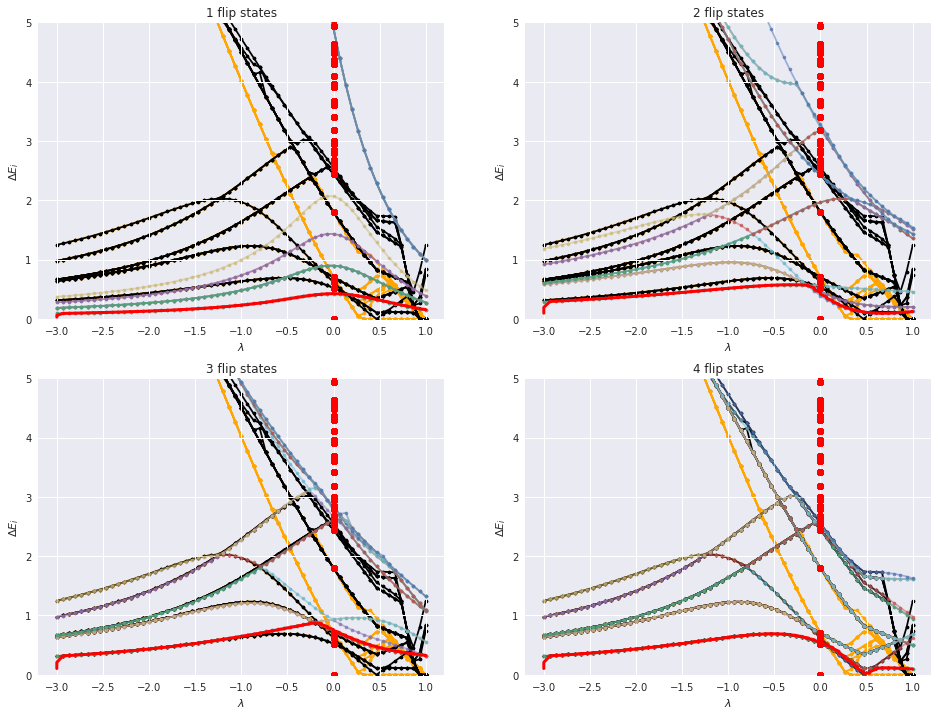

In [39]:
param = {
    'L' : [2,2,2],
    'gp' : 'fermions'
}

# Read the data.
flip_levels = [1,2,3,4]
le_datafile = data_dir+'LE_results_{:s}_all-ws_{:d}x{:d}x{:d}.hdf5'.format(param['gp'], *param['L'])
le_data = {k : retrieve_le_spectrum_numpy(le_datafile, grp='ex{:d}'.format(k)) for k in flip_levels}

# Debasish data.
db_datadir = '../c_code/ED_3d/'
db_fermi = pd.read_csv(db_datadir+'fermiLinks/evals.dat', names=['n', 'energy'], sep='\s+')


with plt.style.context('seaborn'):
    ncols = 2
    nrows = int(np.ceil(len(flip_levels)/ncols))
    fig, bx = plt.subplots(nrows,ncols)
    fig.set_size_inches(8*ncols,6*nrows)
    bx = bx.flatten()
        
    for k, max_level in enumerate(range(1,len(flip_levels)+1)):

        # Toggls the number of levels only in the upper plot.
        n_states = 20
    #     max_level = 3

        lambdas = le_data[max_level][0]
        data = le_data[max_level][1]
        gs = data[:,0]
        for i in range(1, n_states):
            bx[k].plot(lambdas, data[:,i]-gs, marker='.', ls='-', alpha=0.5)
            if i==1:
                mavg = moving_average(data[:,i]-gs)
                bx[k].plot(lambdas, mavg, marker='', ls='-', color='red', zorder=10, lw=3)
                
            db = np.array(sorted(db_fermi['energy']))
            bx[k].plot([0]*len(db), db-db[0], color='red', ls='', marker='o')


                        
        # Full solution (all ws).
        full_datafile = data_dir+'results_fermions_all-ws_2x2x2.hdf5'
        lambdas, full_data = retrieve_spectrum_numpy(full_datafile)
        gs = full_data[:,0]
        for i in range(1, n_states):
            bx[k].plot(lambdas, full_data[:,i]-gs, marker='.', ls='-', color='orange', zorder=0)
            
            
        # Full solution (0,0,0).
        full_datafile = data_dir+'results_fermions_wx_2-wy_2-wz_2_2x2x2.hdf5'
        lambdas, full_data = retrieve_spectrum_numpy(full_datafile)
        gs = full_data[:,0]
        for i in range(1, n_states):
            bx[k].plot(lambdas, full_data[:,i]-gs, marker='.', ls='-', color='black', zorder=0)

        # Bosons!
        full_datafile = data_dir+'multi_spectrum_bosons_wx_2-wy_2-wz_2_2x2x2.dat'
        lambdas, full_data = retrieve_spectrum_numpy(full_datafile)
        gs = full_data[:,0]
        for i in range(1, n_states):
            pass
#             bx[k].plot(lambdas, full_data[:,i]-gs, marker='.', ls='', color='green', zorder=0)
            
            
        bx[k].set_xlabel('$\\lambda$')
        bx[k].set_ylabel('$\\Delta E_i$')
        bx[k].set_ylim(0, 5)
        bx[k].set_title('{:d} flip states'.format(max_level))